# MSA 2024 Phase 2 - Part 1

In [26]:
# installing the packages needed for part 1
!pip install scikit-learn
!pip install numpy
!pip install pandas
!pip install seaborn
!pip install matplotlib

In [27]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Find all variables and understand them

In [28]:
# read data
sales = pd.read_csv('store_sales.csv', encoding='latin1') 
# went through process of elimination to find the encoding that worked with reading the file through pandas
sales[:5]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [29]:
# finding the standard deviation, and mean of all columns with integer/float values
sales.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000
mean,5041.643564,55726.556341,349.834887,3.785007,0.173923,8.699327
std,2885.740258,32261.888225,503.179145,2.251620,0.181547,136.049246
min,1.000000,1040.000000,1.892000,1.000000,0.000000,-1862.312400
25%,2568.000000,22801.000000,47.040000,2.000000,0.000000,-12.849000
50%,5145.000000,60505.000000,182.220000,3.000000,0.200000,7.774800
75%,7534.000000,90032.000000,435.168000,5.000000,0.300000,33.726600
max,9991.000000,99301.000000,4416.174000,14.000000,0.700000,1013.127000


# Data interpretation:
`Row ID and Postal Code:` Data that has no interpretation value, based on its numeric values

`Sales:` Sales with heavy variation in amount, which I assume is mostly due to how often furnitures get pricey

`Quantity:` Number remains low, mostly due to how furnitures are big and therefore more singular items, bought infrequently

`Discount:` Quite common to see discounts made on each sale, with mean discount per transaction at what I'm assuming is 17.3%. Is the store running as second hand? 

`Profit:` Mean is close to 0. Could the store be running as a non-profit instead of second hand, since its barely breaking even?

In [30]:
# finding out what value types are for each row
sales.info() # I notice that date columns or objects rather than date. Will be converting them to dates later on for manipulation

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

## 3. Visualise data

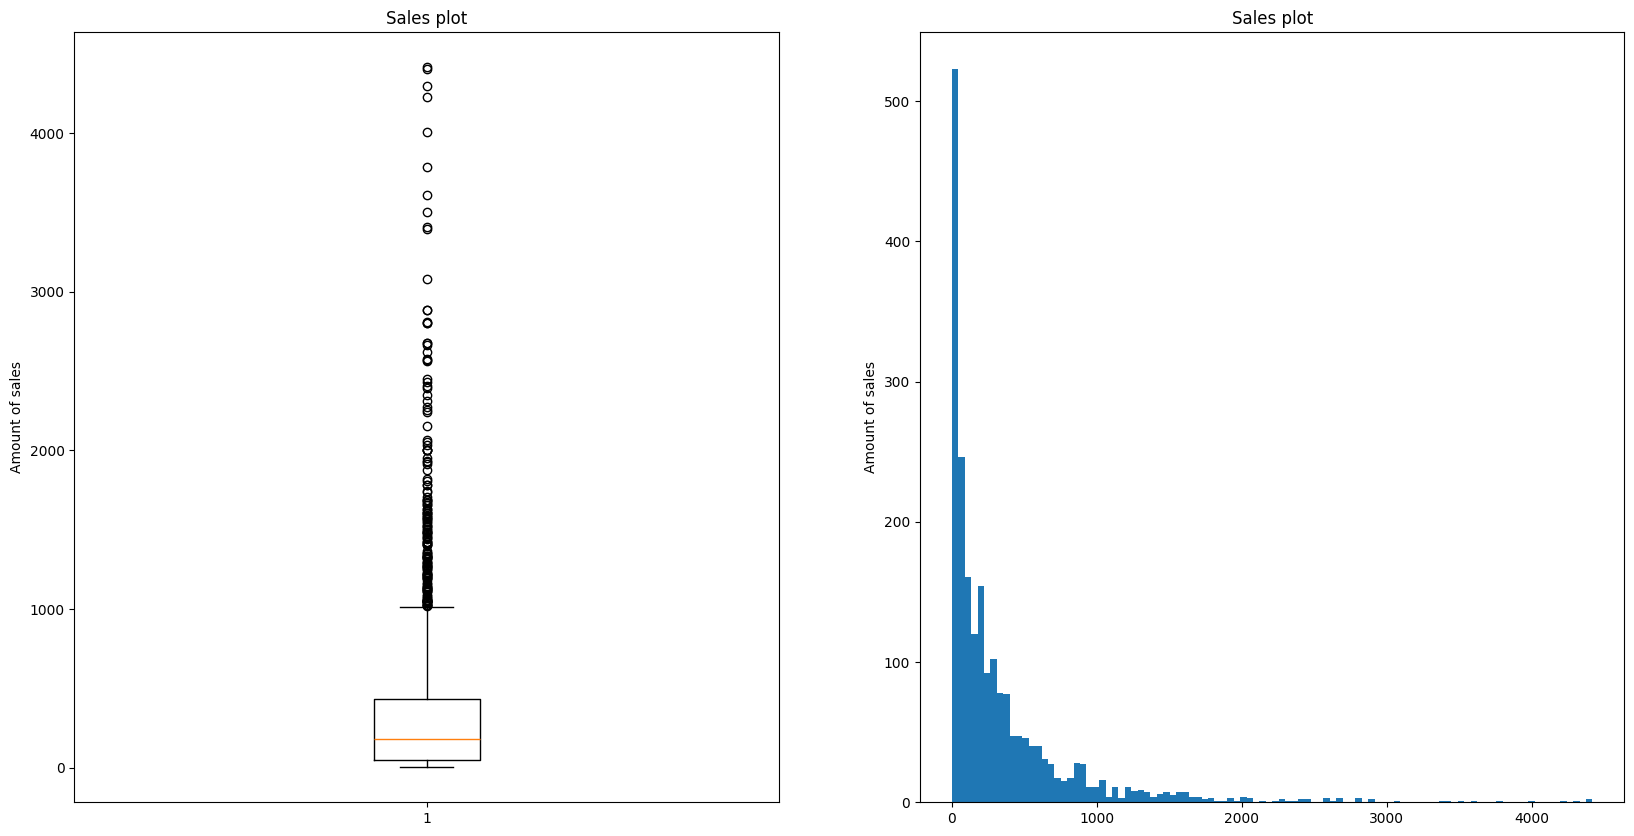

In [31]:
# creating graphs to visualize sales from the data frame

# creating two separate graphs
fig, (ax1, ax2) = plt.subplots(ncols=2, # ncols = number of graphs in our column
                      figsize=(20,10)) # figsize = size of our figure
# fig = figure, or the object representing the entirety of the graph
# ax1, ax2 = axes, or the graphs within the figure

# create labels for our two graphs
ax1.set(title='Sales plot',
       ylabel='Amount of sales')
ax2.set(title='Sales plot',
       ylabel='Amount of sales')

# create a box and whisker plot to look at possible outliers
ax1.boxplot(sales['Sales']);
# create a histogram to look at how the data cluster from its min and max value
ax2.hist(sales['Sales'], bins=100); # bin = the number of bars we want in the graph for detail. Higher the number = Higher degree of specificity

# Note: ; will be seen on all graph codes, to prevent little messages from popping up, while printing graphs

# Graph comments
1. Good number of variations of higher priced sales, which is a given as furnitures are often infrequent, but expensive purchases
2. Sales taper off the more expensive a sale/transaction has been made, as not often can you make such big purchases

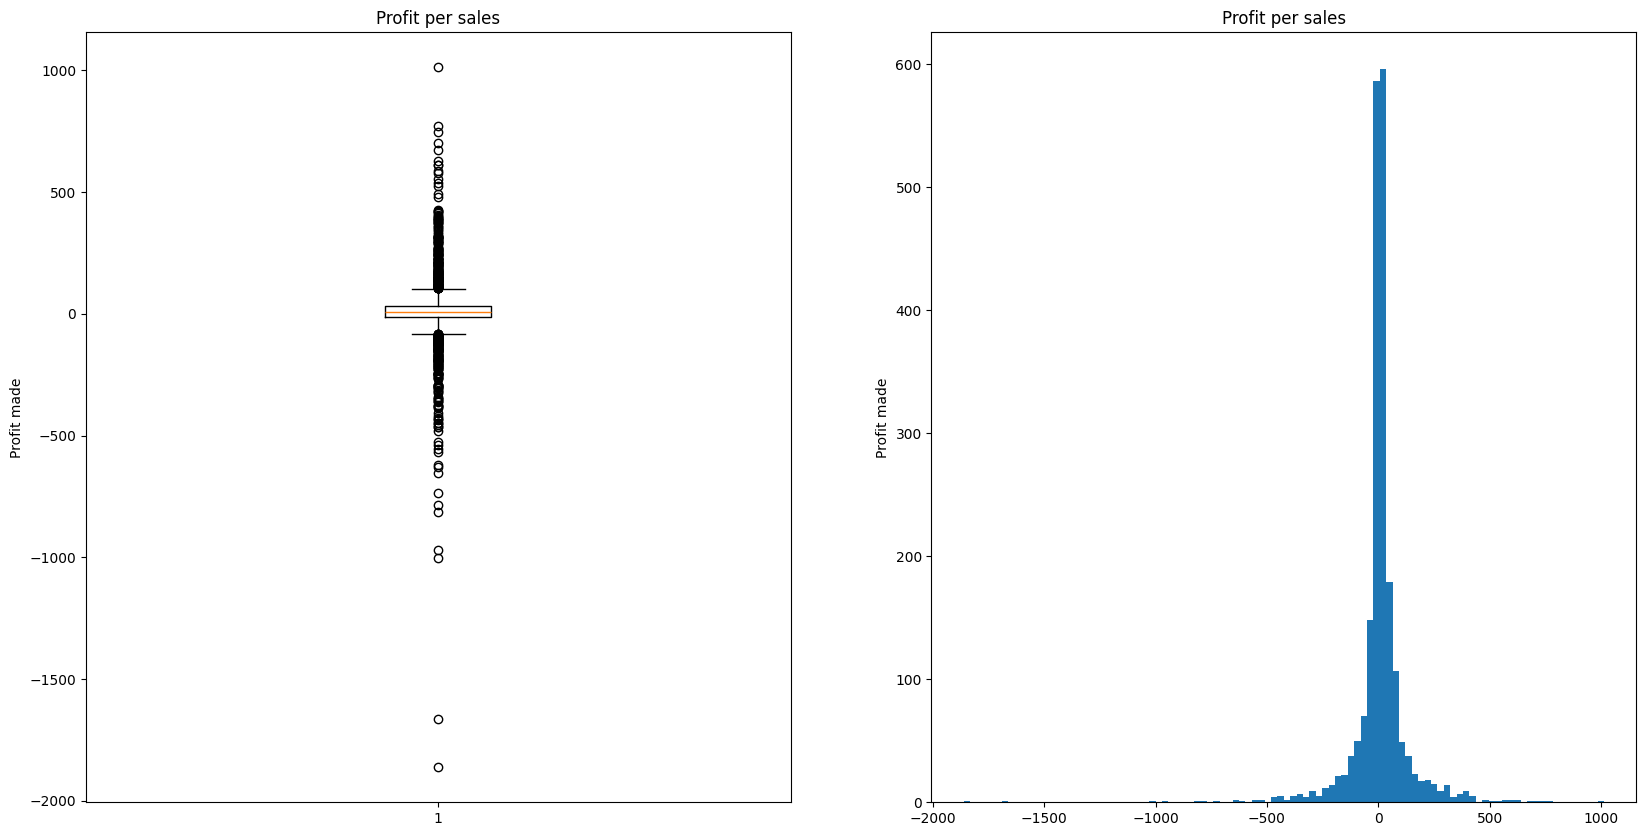

In [32]:
# creating graphs to visualize profit from the data frame
# code here is essentially the same as the ones above, just with different names on labels to suit the data we're looking at

fig, (ax1, ax2) = plt.subplots(ncols=2,
                      figsize=(20,10))

ax1.set(title='Profit per sales',
       ylabel='Profit made')
ax2.set(title='Profit per sales',
        ylabel='Profit made')

ax1.boxplot(sales['Profit']);
ax2.hist(sales['Profit'], bins=100);

# Graph comments
1. Theres a heavy variation in the total profits made, per every sale made. Its not uncommon to see profit loss for a transaction made
3. Few outliers, values either above or below 1,000 seems improbable

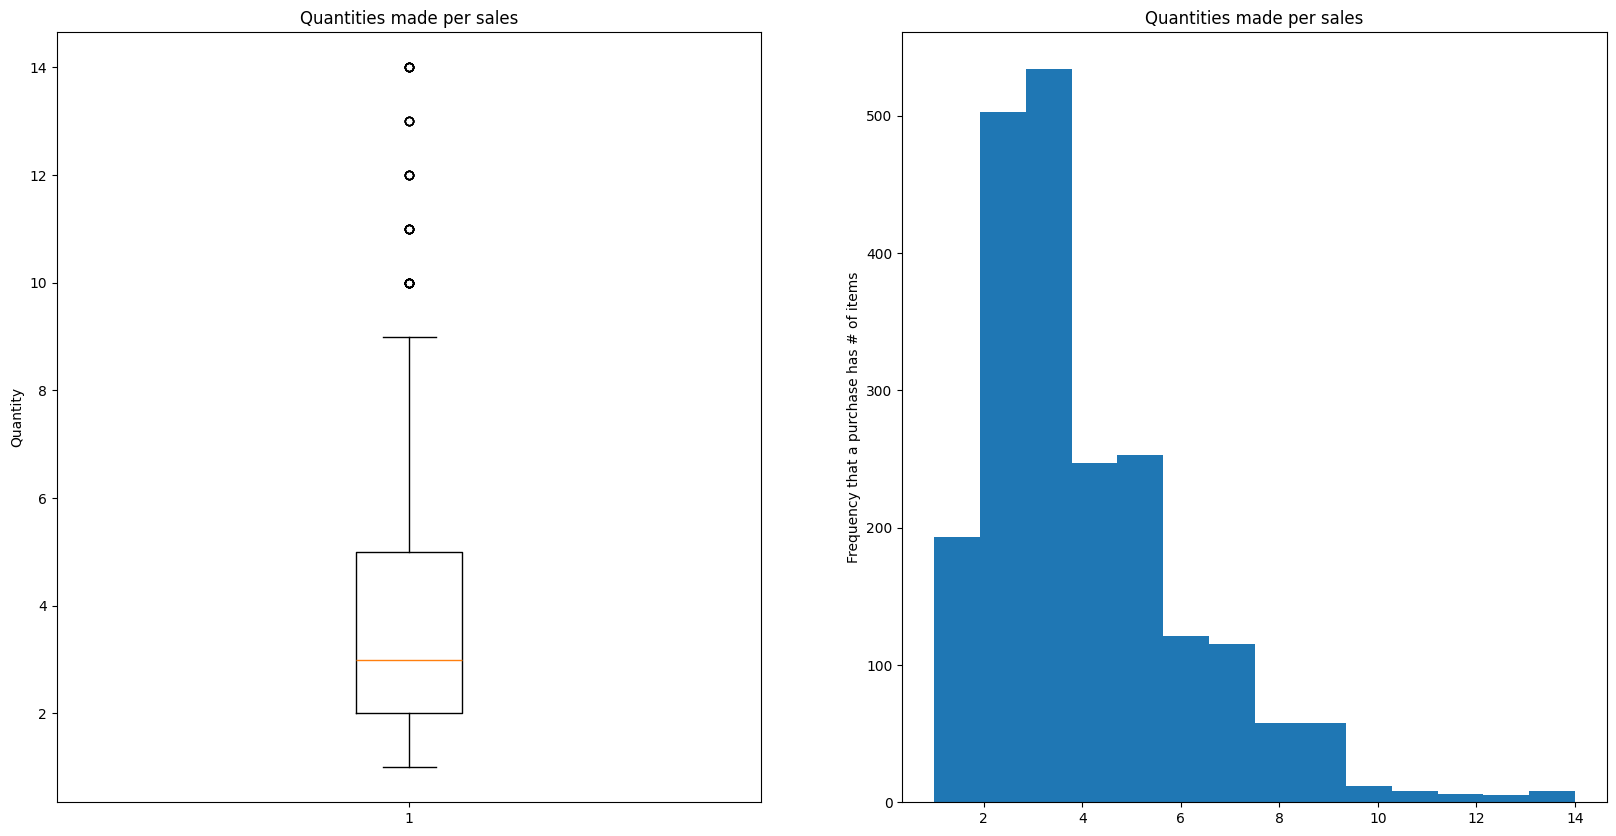

In [33]:
# creating graphs to visualize quantity from the data frame
# code here is essentially the same as the ones above, just with different names on labels to suit the data we're looking at

fig, (ax1, ax2) = plt.subplots(ncols=2,
                               figsize=(20,10))

ax1.set(title='Quantities made per sales',
        ylabel='Quantity')
ax2.set(title='Quantities made per sales',
        ylabel='Frequency that a purchase has # of items')

ax1.boxplot(sales['Quantity']);
ax2.hist(sales['Quantity'], bins=14); # bins is different here, because quantities are limited between 1 to 14 in our data, and are integers

# Graph comments
1. Quantities are often small, as furniture is not a typical daily purchase for most people. E.g. Tables and Sofas
2. A few outliers of people, buying furniture of more than 9 on one singular purchase/sales

In [34]:
# converting data column from object type, into date type in order to work with them in graphs
sales['Order Date'] = pd.to_datetime(sales['Order Date'], format='%m/%d/%Y')
sales['Ship Date'] = pd.to_datetime(sales['Ship Date'], format='%m/%d/%Y')

sales.info() # confirming if Dtype has changed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         2121 non-null   int64         
 1   Order ID       2121 non-null   object        
 2   Order Date     2121 non-null   datetime64[ns]
 3   Ship Date      2121 non-null   datetime64[ns]
 4   Ship Mode      2121 non-null   object        
 5   Customer ID    2121 non-null   object        
 6   Customer Name  2121 non-null   object        
 7   Segment        2121 non-null   object        
 8   Country        2121 non-null   object        
 9   City           2121 non-null   object        
 10  State          2121 non-null   object        
 11  Postal Code    2121 non-null   int64         
 12  Region         2121 non-null   object        
 13  Product ID     2121 non-null   object        
 14  Category       2121 non-null   object        
 15  Sub-Category   2121 n

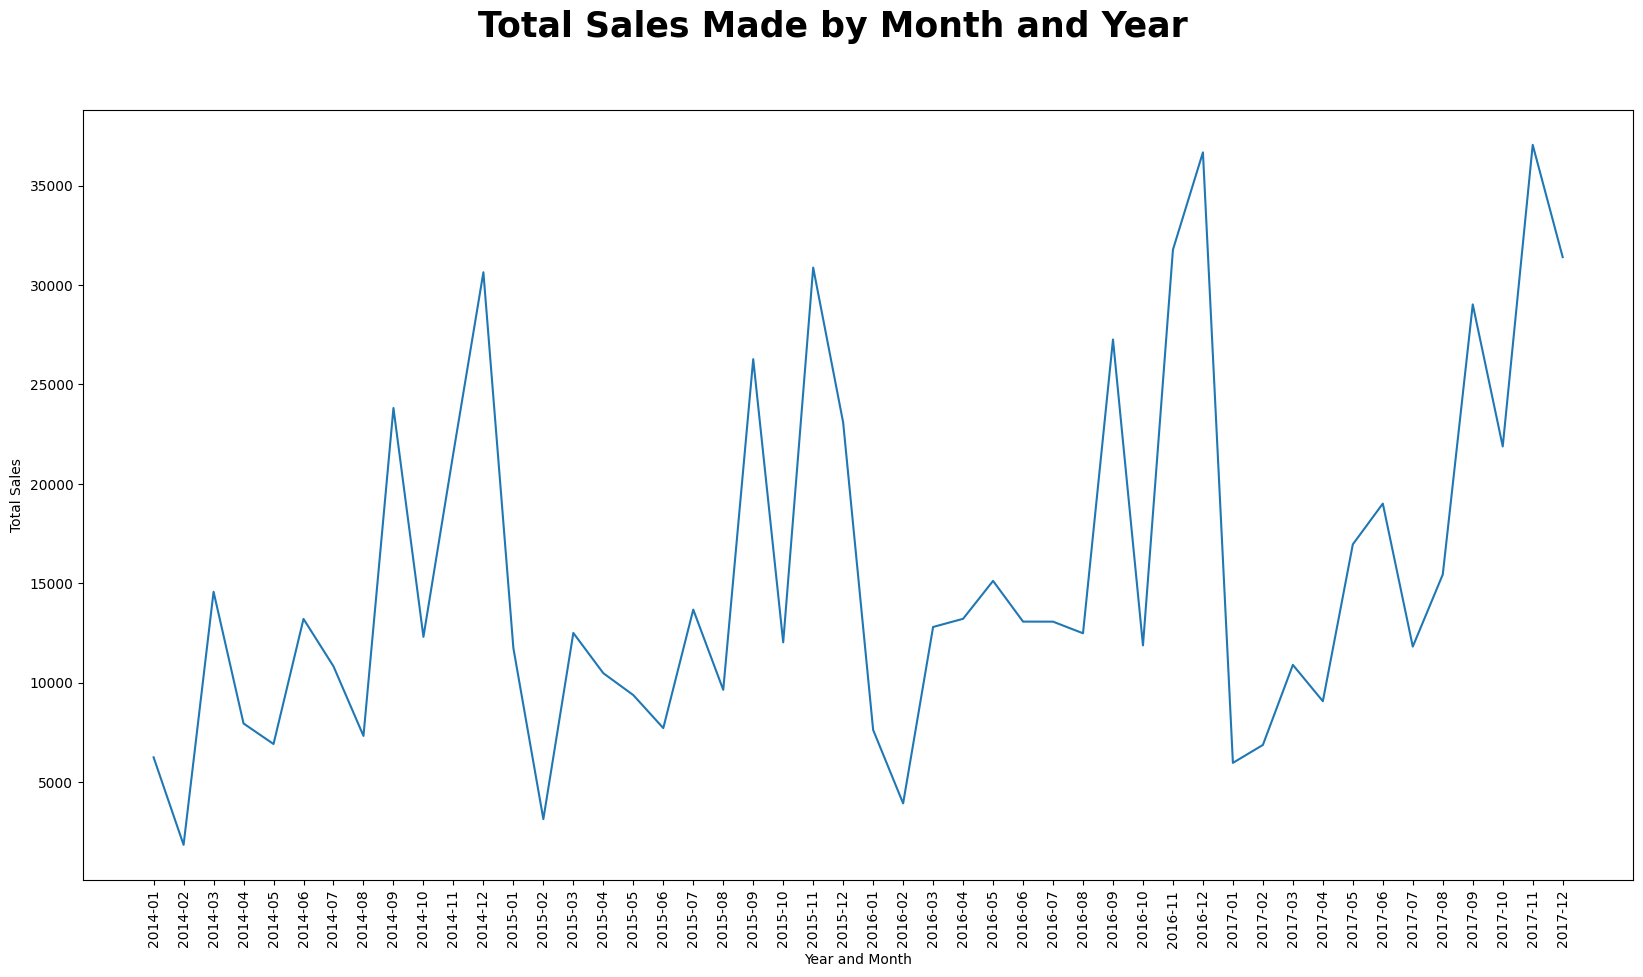

In [35]:
# After converting our date columns into proper date types, I want to create a graph out of them, and see if there are trends in how many total sales
# have been made over the time period, that the data has been recorded from this furniture store/brand

sales = sales.sort_values(by='Order Date') # sorting the data frame by the date of orders

# create a new column, to only include the 'Year' and 'Month' of the 'Order Date'
sales['YearMonth'] = sales['Order Date'].dt.to_period('M')

# find the sum of sales, by every individual Year-Month
monthly_sales = sales.groupby('YearMonth')['Sales'].sum().reset_index()
# reset_index() = helps resetting the index to the default integer index

# create a graph
fig, ax = plt.subplots(figsize=(20,10)) # set figure size, and create fig + ax for our new graph

# set the y and x labels
ax.set(ylabel='Total Sales',
      xlabel='Year and Month',)

# plot the graph with our new monthly_sales dataframe
ax.plot(monthly_sales['YearMonth'].astype(str), monthly_sales['Sales']); # YearMonth has to be converted to string, or else theres an error
ax.tick_params(axis='x', rotation=90) # rotate our x labels 90 degrees, or else the labels fuse with the others and make it unreadable

fig.suptitle('Total Sales Made by Month and Year', fontsize=25, fontweight='bold'); 
# creating a tite on the figure, make it larger and bolder for readability

# Graph Comments
1. There are noticeable peaks of total sales made, on the months approaching the end of the calendar year
2. Sharp declines are seen as the new years begin. This means that lots of people start purchasing furnitures during the holiday seasons, and dips as the seasons end
3. There are noticeable trends, where every September, theres a huge spike in total sales. Could it be certain holidays during that time in the United States?
4. There are also peaks in sales on March and around June, although less pronounced than September

## 2. Clean data

In [36]:
# looking at the unique values per column. We're looking to remove a few redundant columns from the dataframe
sales.nunique()

Row ID           2121
Order ID         1764
Order Date        889
Ship Date         960
Ship Mode           4
Customer ID       707
Customer Name     707
Segment             3
Country             1
City              371
State              48
Postal Code       454
Region              4
Product ID        375
Category            1
Sub-Category        4
Product Name      380
Sales            1636
Quantity           14
Discount           11
Profit           1777
YearMonth          48
dtype: int64

In [37]:
# Currently a lot of columns, some should be removed to make it easier to read the necessary informations

# Country, Category > Columns with only one unique value
# Customer Name > Customer ID completes the same role, and also privacy reasons
# Product ID > Product Name completes the same role
# Region, Postal Code > We don't need that specification of location, when we have city and state information
# Row ID > Despite sequential order, it skips numbers randomly, does not match order date sequentially and does not match the index numbering

sales = sales.drop(['Country', 'Category', 'Customer Name', 'Region', 'Postal Code', 'Product ID', 'Row ID'], axis=1)
sales

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,City,State,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,YearMonth
1577,CA-2014-167199,2014-01-06,2014-01-10,Standard Class,ME-17320,Home Office,Henderson,Kentucky,Chairs,Global Deluxe High-Back Manager's Chair,2573.820,9,0.0,746.4078,2014-01
1626,CA-2014-105417,2014-01-07,2014-01-12,Standard Class,VS-21820,Consumer,Huntsville,Texas,Furnishings,"Howard Miller 14-1/2"" Diameter Chrome Round Wa...",76.728,3,0.6,-53.7096,2014-01
181,CA-2014-149020,2014-01-10,2014-01-15,Standard Class,AJ-10780,Corporate,Springfield,Virginia,Furnishings,"Howard Miller 11-1/2"" Diameter Ridgewood Wall ...",51.940,1,0.0,21.2954,2014-01
150,CA-2014-130092,2014-01-11,2014-01-14,First Class,SV-20365,Consumer,Dover,Delaware,Furnishings,"DAX Value U-Channel Document Frames, Easel Back",9.940,2,0.0,3.0814,2014-01
631,CA-2014-109232,2014-01-13,2014-01-16,Second Class,ND-18370,Consumer,Mount Pleasant,South Carolina,Chairs,Global Highback Leather Tilter in Burgundy,545.940,6,0.0,87.3504,2014-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1619,US-2017-158526,2017-12-29,2018-01-01,Second Class,KH-16360,Consumer,Louisville,Kentucky,Chairs,Harbour Creations Steel Folding Chair,258.750,3,0.0,77.6250,2017-12
1617,US-2017-158526,2017-12-29,2018-01-01,Second Class,KH-16360,Consumer,Louisville,Kentucky,Chairs,DMI Arturo Collection Mission-style Design Woo...,1207.840,8,0.0,314.0384,2017-12
1057,CA-2017-146626,2017-12-29,2018-01-05,Standard Class,BP-11185,Corporate,Anaheim,California,Furnishings,Nu-Dell Executive Frame,101.120,8,0.0,37.4144,2017-12
1618,US-2017-158526,2017-12-29,2018-01-01,Second Class,KH-16360,Consumer,Louisville,Kentucky,Chairs,"Global Leather and Oak Executive Chair, Black",300.980,1,0.0,87.2842,2017-12


In [38]:
# Order ID number is too long, and was figuring whether I could remove the front portion of ID, but still keeping their unique values
sales['Order ID'].nunique()

1764

In [39]:
# e.g. 'CA-2014-115812' and remove the first part 'CA-2014'
id = sales['Order ID'].str[8:]
id.nunique()

1764

In [40]:
sales['Order ID'] = sales['Order ID'].str[8:] # change the order ID within and remove the first few parts of the ID
sales # now the Order ID looks cleaner and more readable

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,City,State,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,YearMonth
1577,167199,2014-01-06,2014-01-10,Standard Class,ME-17320,Home Office,Henderson,Kentucky,Chairs,Global Deluxe High-Back Manager's Chair,2573.820,9,0.0,746.4078,2014-01
1626,105417,2014-01-07,2014-01-12,Standard Class,VS-21820,Consumer,Huntsville,Texas,Furnishings,"Howard Miller 14-1/2"" Diameter Chrome Round Wa...",76.728,3,0.6,-53.7096,2014-01
181,149020,2014-01-10,2014-01-15,Standard Class,AJ-10780,Corporate,Springfield,Virginia,Furnishings,"Howard Miller 11-1/2"" Diameter Ridgewood Wall ...",51.940,1,0.0,21.2954,2014-01
150,130092,2014-01-11,2014-01-14,First Class,SV-20365,Consumer,Dover,Delaware,Furnishings,"DAX Value U-Channel Document Frames, Easel Back",9.940,2,0.0,3.0814,2014-01
631,109232,2014-01-13,2014-01-16,Second Class,ND-18370,Consumer,Mount Pleasant,South Carolina,Chairs,Global Highback Leather Tilter in Burgundy,545.940,6,0.0,87.3504,2014-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1619,158526,2017-12-29,2018-01-01,Second Class,KH-16360,Consumer,Louisville,Kentucky,Chairs,Harbour Creations Steel Folding Chair,258.750,3,0.0,77.6250,2017-12
1617,158526,2017-12-29,2018-01-01,Second Class,KH-16360,Consumer,Louisville,Kentucky,Chairs,DMI Arturo Collection Mission-style Design Woo...,1207.840,8,0.0,314.0384,2017-12
1057,146626,2017-12-29,2018-01-05,Standard Class,BP-11185,Corporate,Anaheim,California,Furnishings,Nu-Dell Executive Frame,101.120,8,0.0,37.4144,2017-12
1618,158526,2017-12-29,2018-01-01,Second Class,KH-16360,Consumer,Louisville,Kentucky,Chairs,"Global Leather and Oak Executive Chair, Black",300.980,1,0.0,87.2842,2017-12


In [41]:
# I noticed the indexed data frame is unordered, due to me sorting it by the consecutive order date. So I'll be resetting the index
sales = sales.reset_index(drop=True) # drop=True, ensures the removal of the old index column
sales

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,City,State,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,YearMonth
0,167199,2014-01-06,2014-01-10,Standard Class,ME-17320,Home Office,Henderson,Kentucky,Chairs,Global Deluxe High-Back Manager's Chair,2573.820,9,0.0,746.4078,2014-01
1,105417,2014-01-07,2014-01-12,Standard Class,VS-21820,Consumer,Huntsville,Texas,Furnishings,"Howard Miller 14-1/2"" Diameter Chrome Round Wa...",76.728,3,0.6,-53.7096,2014-01
2,149020,2014-01-10,2014-01-15,Standard Class,AJ-10780,Corporate,Springfield,Virginia,Furnishings,"Howard Miller 11-1/2"" Diameter Ridgewood Wall ...",51.940,1,0.0,21.2954,2014-01
3,130092,2014-01-11,2014-01-14,First Class,SV-20365,Consumer,Dover,Delaware,Furnishings,"DAX Value U-Channel Document Frames, Easel Back",9.940,2,0.0,3.0814,2014-01
4,109232,2014-01-13,2014-01-16,Second Class,ND-18370,Consumer,Mount Pleasant,South Carolina,Chairs,Global Highback Leather Tilter in Burgundy,545.940,6,0.0,87.3504,2014-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2116,158526,2017-12-29,2018-01-01,Second Class,KH-16360,Consumer,Louisville,Kentucky,Chairs,Harbour Creations Steel Folding Chair,258.750,3,0.0,77.6250,2017-12
2117,158526,2017-12-29,2018-01-01,Second Class,KH-16360,Consumer,Louisville,Kentucky,Chairs,DMI Arturo Collection Mission-style Design Woo...,1207.840,8,0.0,314.0384,2017-12
2118,146626,2017-12-29,2018-01-05,Standard Class,BP-11185,Corporate,Anaheim,California,Furnishings,Nu-Dell Executive Frame,101.120,8,0.0,37.4144,2017-12
2119,158526,2017-12-29,2018-01-01,Second Class,KH-16360,Consumer,Louisville,Kentucky,Chairs,"Global Leather and Oak Executive Chair, Black",300.980,1,0.0,87.2842,2017-12


In [42]:
# lets check for any missing values in the data frame
sales.isnull().sum() # so far no present null values, which is great!

Order ID        0
Order Date      0
Ship Date       0
Ship Mode       0
Customer ID     0
Segment         0
City            0
State           0
Sub-Category    0
Product Name    0
Sales           0
Quantity        0
Discount        0
Profit          0
YearMonth       0
dtype: int64

In [43]:
# from a previous graph comment, i stated that the profit values above or below 1,000 seems improbable, and will be removing them
sales = sales[(sales['Profit'] <= 1000) & (sales['Profit'] >= -1000)] # using boolean operator '&' to match both statements of:
                                                                               # under and equal to 1000 AND over and equal to -1000 in column 'Profit'
sales.count() # 2117 entries out of 2121, removed 4 results in total

Order ID        2117
Order Date      2117
Ship Date       2117
Ship Mode       2117
Customer ID     2117
Segment         2117
City            2117
State           2117
Sub-Category    2117
Product Name    2117
Sales           2117
Quantity        2117
Discount        2117
Profit          2117
YearMonth       2117
dtype: int64

In [44]:
# I also want to check on the sales with values above 3000. Its quite the outlier, but its possible given how expensive furnitures can get
above_3000 = sales[sales['Sales'] >= 3000]
above_3000 # orders seem probable, especially with the higher than average quantities for each transaction. (Most sales have 2-3 in quantity)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,City,State,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,YearMonth
216,116246,2014-09-12,2014-09-17,Second Class,LW-17215,Consumer,New York City,New York,Chairs,HON 5400 Series Task Chairs for Big and Tall,3785.292,6,0.10,420.5880,2014-09
315,128209,2014-11-17,2014-11-22,Standard Class,GT-14710,Consumer,Buffalo,New York,Bookcases,DMI Eclipse Executive Suite Bookcases,4007.840,10,0.20,-50.0980,2014-11
369,168494,2014-12-12,2014-12-14,Second Class,NP-18700,Consumer,Fresno,California,Tables,Bretford Rectangular Conference Table Tops,3610.848,12,0.20,135.4068,2014-12
470,164301,2015-03-26,2015-03-30,Standard Class,EB-13840,Corporate,Seattle,Washington,Tables,Bush Advantage Collection Racetrack Conference...,3393.680,8,0.00,610.8624,2015-03
676,126977,2015-09-17,2015-09-23,Standard Class,PF-19120,Consumer,New York City,New York,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",4228.704,6,0.20,158.5764,2015-09
1024,122903,2016-05-27,2016-05-29,Second Class,LA-16780,Corporate,Detroit,Michigan,Chairs,HON 5400 Series Task Chairs for Big and Tall,3504.900,5,0.00,700.9800,2016-05
1344,107104,2016-11-26,2016-11-30,Standard Class,MS-17365,Consumer,Los Angeles,California,Bookcases,DMI Eclipse Executive Suite Bookcases,3406.664,8,0.15,160.3136,2016-11
1737,118892,2017-08-17,2017-08-22,Second Class,TP-21415,Consumer,Philadelphia,Pennsylvania,Chairs,HON 5400 Series Task Chairs for Big and Tall,4416.174,9,0.30,-630.8820,2017-08


In [45]:
# I want to look at possibly one hot encoding columns, that may offer interesting findings in the data
sales.nunique()
# Ship mode, Segment, and Sub-Category seem like good options for one hot encoding, due to smaller numbers of unique values, making any findings with
# these data points more readable than the rest

Order ID        1762
Order Date       888
Ship Date        959
Ship Mode          4
Customer ID      705
Segment            3
City             371
State             48
Sub-Category       4
Product Name     380
Sales           1632
Quantity          14
Discount          11
Profit          1773
YearMonth         48
dtype: int64

In [46]:
# i will create one hot encoding using pd.get_dummies, and form separate dataframes for each one to possibly in identifying correlations in the data
ship_mode = pd.get_dummies(sales, columns=['Ship Mode'])
segment = pd.get_dummies(sales, columns=['Segment'])
sub_category = pd.get_dummies(sales, columns=['Sub-Category'])

## 4. Identify correlated variables

In [47]:
# correlate discounts with profits. Correlation numbers given is between 1 and -1
correlation = sales['Profit'].corr(sales['Discount'])
correlation # we see that the correlation of Discount to Profit is a negative number
# this means as discount increases, the amount of profit decreases. The correlation is somewhat strong, given the max is -1

-0.5164919424523611

In [48]:
# now I want to see a correlation matrix with all the numeric variables in our dataset to see any interesting findings
numeric_data = sales[['Sales', 'Quantity', 'Discount', 'Profit']]
correlation_matrix = numeric_data.corr()
correlation_matrix.loc['Profit'] # pretty typical results, where if sales increase, profit increase
# same goes with increase in quantity, as that also typically increases the total sales made as well due to buying more

Sales       0.284114
Quantity    0.112372
Discount   -0.516492
Profit      1.000000
Name: Profit, dtype: float64

In [49]:
# I also wondered whether the difference in shipping type, lead to quicker dispatch of a sale, after it has been ordered
# so I'll calculate the absolute difference between order date, and ship date
ship_mode['Order to Shipped'] = ship_mode['Ship Date'] - ship_mode['Order Date']
ship_mode['Order to Shipped']

0      4 days
1      5 days
2      5 days
3      3 days
4      3 days
        ...  
2116   3 days
2117   3 days
2118   7 days
2119   3 days
2120   4 days
Name: Order to Shipped, Length: 2117, dtype: timedelta64[ns]

In [50]:
first_class = ship_mode[ship_mode['Ship Mode_First Class'] == 1]['Order to Shipped'].mean()
# going into the one hot column for first class, and finding the ones that are 'True' in the column, since we want to go through each column one by one
# then go to the column we had created from the previous line, and find the mean of all the values, based on if first class column is 'True' as well
same_day = ship_mode[ship_mode['Ship Mode_Same Day'] == 1]['Order to Shipped'].mean()
# do the same for the other three shipping options
second_class = ship_mode[ship_mode['Ship Mode_Second Class'] == 1]['Order to Shipped'].mean()
standard_class = ship_mode[ship_mode['Ship Mode_Standard Class'] == 1]['Order to Shipped'].mean()

print(f'Mean time it takes from `Order Date` to `Shipped Date` based on the type of shipping a customer has used: \n'
      f'First class: {first_class} \n'
      f'Same day: {same_day} \n'
      f'Second class: {second_class} \n'
      f'Standard class: {standard_class}')

# there is clear distinction on how fast a shipment gets dispatched, once it's ordered. 
# Same day shipment are shipped typically on the day of purchase
# Then goes from first, to second, then standard shipment, that takes almost 5 days to be shipped, from the date of the order

Mean time it takes from `Order Date` to `Shipped Date` based on the type of shipping a customer has used: 
First class: 2 days 03:23:11.411042944 
Same day: 0 days 00:36:18.151260504 
Second class: 3 days 06:18:35.492957746 
Standard class: 4 days 23:28:47.768860353


## 5. Summary

## Steps taken to perform EDA
`1. Data Loading/Understanding:` Importing all nessecary libraries, loading data into a dataframe, and understanding the columns/numeric variables

`2. Data Visualization:` Visualize the numeric data from the dataset into graphs, to find any interesting results and patterns

`3. Data Aggregation:` Using the date feature, we cluster them by month, and aggregate the sales by the month, to then visualize as graphs to find patterns/trends

`4. Data Cleaning:` Removing unnesecary columns to data analysis, checking missing values and simplifying the Order ID to make things more readible/manageable

`5. Data Filtering:` Removing data that seem to be outliers in the dataset, to ensure better accuracy in data analysis

`6. One-hot Encoding:` Applied One-hot encoding on certain columns, that could be used for further data analysis/pattern finding

`7. Correlation Analysis:` Analyzing the correlation of numeric columns, to the 'Profit' column

`8. Feature Engineering:` Forming a new column/feature, based on difference of 'Order Date' and 'Ship Date' for data analysis 

## Interesting findings during EDA and Preprocessing
`1. Low Profit Levels:` Find it a little strange how unusually low the mean profits are for each sale, especially if its a business that expects to turn a profit. Makes me question if its a non-profit store, or second hand shop?

`2. Sales Trends:` Visualized the monthly total sales with a bit of data aggregation, and it displays high increases during the end of the year, when holidays typically occur

`3. Correlation of Profit and Discount:` There is a negative correlation between discount and profit, indicating that higher discounts are typically associated with lower profits, which is understandable on the basis of how business works, as discounts work on the benefit of the customer, not the business

`4. Shipping Time Analysis:` After forming a new feature, I noticed that there is a difference in the time between 'Order Date', and 'Ship Date' depending on the shipping a customer chose. Same day shipping is fastest, because (as stated in the name,) the item is shipped typically on the same day as its ordered. With the slowest shipping mode being 'Standard Shipping'